In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.io import wavfile
from scipy import signal
import librosa
from spafe.features.gfcc import gfcc

In [8]:
one = 'one.wav'
two = 'two.wav'


samplerate1, data1 = wavfile.read(one)
samplerate2, data2 = wavfile.read(two)
print('Audio Shape 1:',np.shape(data1),'Audio Shape 2:',np.shape(data2))

Audio Shape 1: (57567,) Audio Shape 2: (95872,)


In [9]:
duration1 = len(data1)/samplerate1
time1 = np.arange(0,duration1,1/samplerate1) #time vector

duration2 = len(data2)/samplerate2
time2 = np.arange(0,duration2,1/samplerate2) #time vector

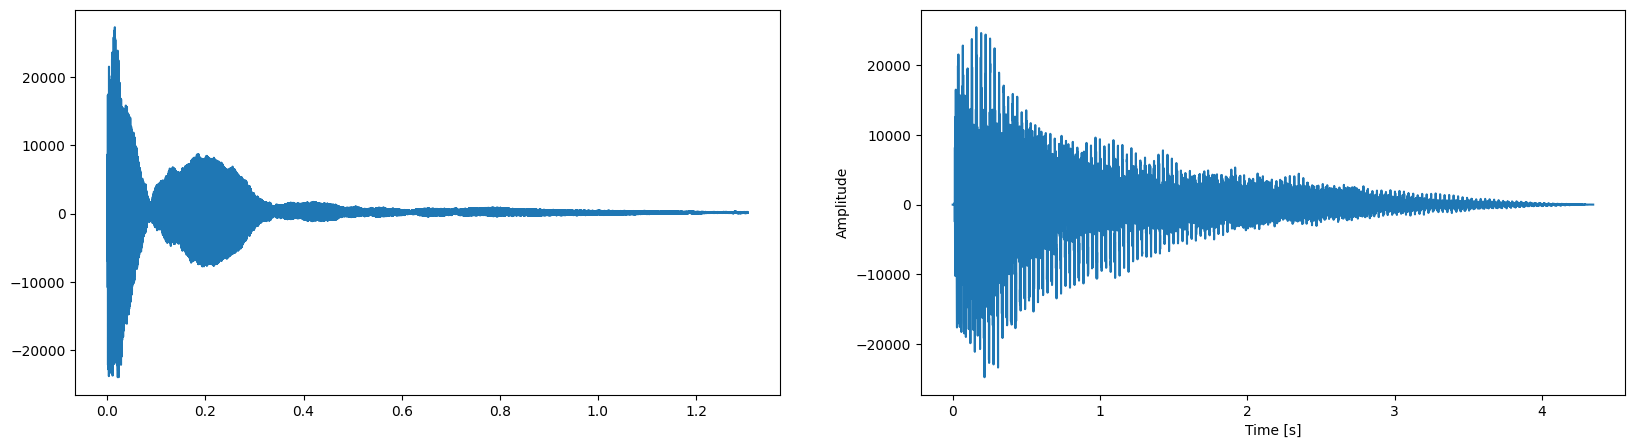

In [10]:
fig, axs = plt.subplots(1,2,figsize=(20, 5))
axs[0].plot(time1, data1)
axs[1].plot(time2, data2)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

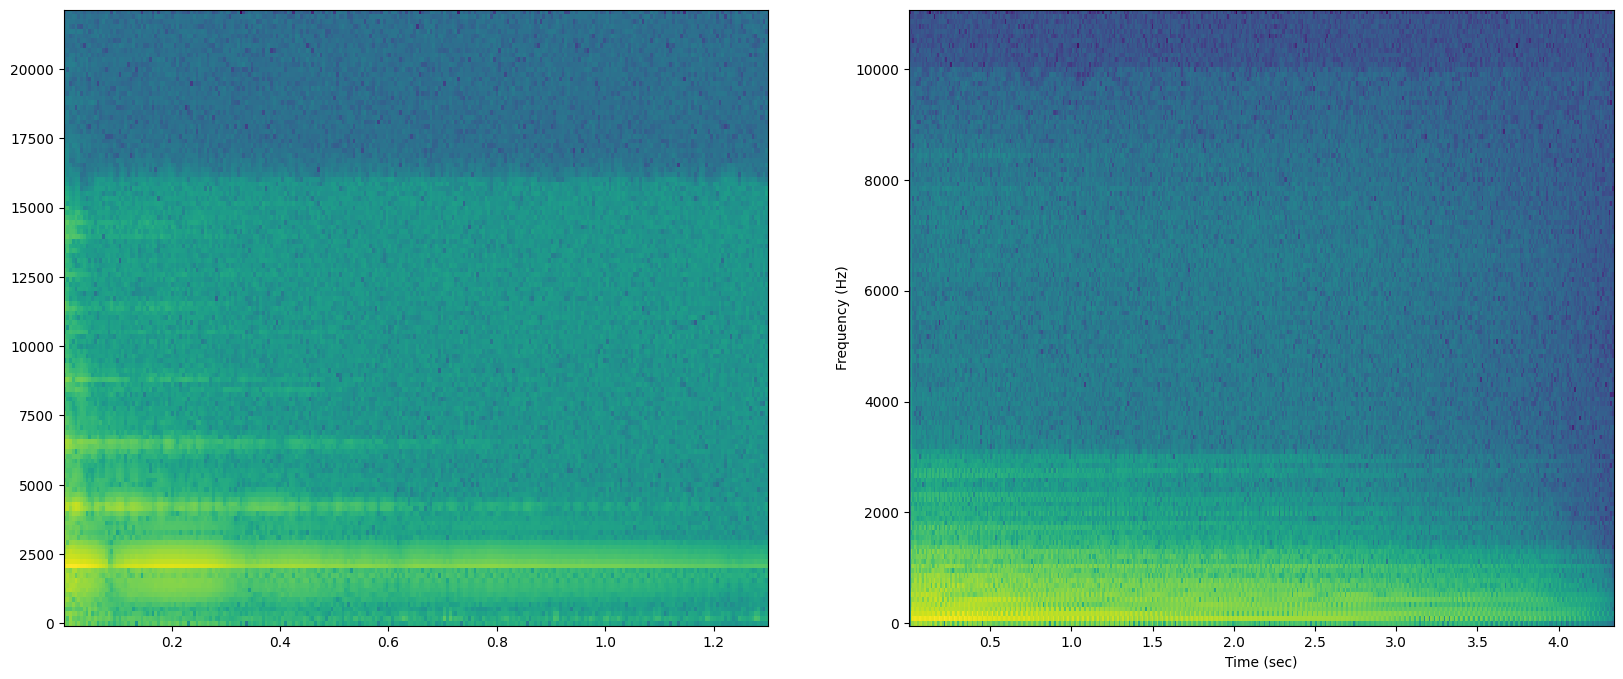

In [11]:
fig, axs = plt.subplots(1,2,figsize=(20, 8))
fr1, tm1, spgram1 = signal.spectrogram(data1,samplerate1)
fr2, tm2, spgram2 = signal.spectrogram(data2,samplerate2)

lspg1 = np.log(spgram1)
lspg2 = np.log(spgram2)
axs[0].pcolormesh(tm1,fr1,lspg1,shading='auto')
axs[1].pcolormesh(tm2,fr2,lspg2,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

In [12]:
samples1, sample_rate1 = librosa.load(one)

y1 = samples1
sr1 = sample_rate1
mfccs1 = librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=10)

samples2, sample_rate2 = librosa.load(two)

y2 = samples2
sr2 = sample_rate2
mfccs2 = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=10)

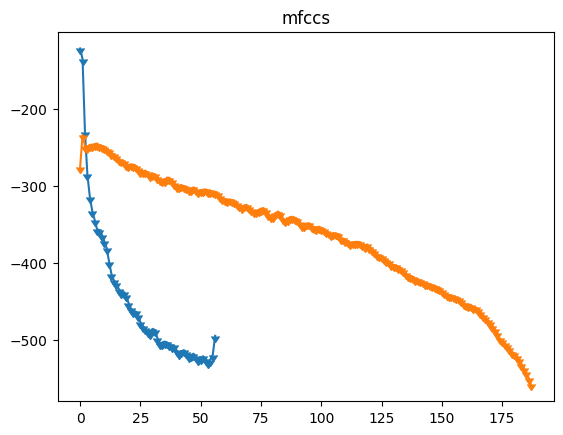

In [15]:
mfccs2 = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=10)
s1 = mfccs1[0:1,:][0,:]
t1 = [*range(len(s1))]
s2 = mfccs2[0:1,:][0,:]
t2 = [*range(len(s2))]
plt.plot(t1,  s1.reshape(57,1),marker=matplotlib.markers.CARETDOWNBASE)
plt.plot(t2,  s2.reshape(188,1),marker=matplotlib.markers.CARETDOWNBASE)
plt.title('mfccs')
plt.show()

In [16]:
samples1, sample_rate1 = librosa.load(one)

y1 = samples1
sr1 = sample_rate1
gfccs1 = gfcc(y1, fs=sr1, num_ceps=1)

samples2, sample_rate2 = librosa.load(two)

y2 = samples2
sr2 = sample_rate2
gfccs2 = gfcc(y2, fs=sr2, num_ceps=1)

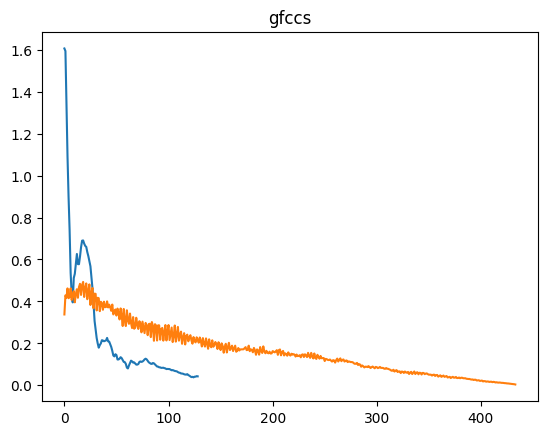

In [17]:
plt.plot(gfccs1)
plt.plot(gfccs2)
plt.title('gfccs')
plt.show()

Видим, что спектрограммы разные, что проявляется в том что один звук очень низкий и долгий, а второй высокий и быстрый. На графиках mfccs и gfccs различия одинаковые: первый звук долго и плавно спускается вниз, когда второй резко падает. Это скорее всего связано с продолжительностью звуковых файлов. Один длиться секунду, второй - четыре.